## Code implementing Kalman filter

In [115]:
import numpy as np
from matplotlib import pyplot as plt
from filterpy import stats

def mul (A, B):
    return np.matmul(A,B)

#To read values from the file
f = open("kalmann.txt", "r")
str = f.readline()

#To read the initial x and y positions of the object
ini_x, ini_y = [float(x) for x in str.split(', ')]
str = f.readline()
t = 1

next_x, next_y, vel_x, vel_y = [float(x) for x in str.split(', ')]

A = np.identity(4)
A[0][2] = t
A[1][3] = t
trans_A = A.T

#Process Covariance matrix
P = np.diag((300, 300, 300, 300))

#Initial state matrix
#Initialising it with the initial positions and the average velocities between old position and new position
#from the next reading to make an estimate
#Since they will help to compare this estimate with the actual measurement in that reading
X = np.matrix([[ini_x, ini_y, vel_x, vel_y]]).T

#To store the values of measured and estimated values of the coordinates
measured_x = [ini_x]
measured_y = [ini_y]
actual_x = [ini_x]
actual_y = [ini_y]

#measurement matrix
H = np.identity(4)

#Identity matrix
I = np.identity(4)

#Process noise covariance
Q = np.diag((0.005, 0.005, 0.005, 0.005))

#Measurement noise covariance
R = np.diag((1, 1, 1, 1))

#Took values of Q and R such that finally, a smooth curve is obtained

while True:
    str = f.readline()
    if(""==str):
        break
    
    #To compute new process covariance
    #MOTION UPDATE STEP
    X = mul(A,X)
    P = mul(A,P)
    P = mul(P,trans_A) + Q
    
    #MEASUREMENT STEP
    mea_x = next_x
    mea_y = next_y
    measured_x.append(mea_x)
    measured_y.append(mea_y)
    next_x, next_y, v_x, v_y = [float(x) for x in str.split(', ')]
    Z = np.matrix([[mea_x, mea_y, v_x, v_y]])
    Y = Z.T - mul(H,X)
        
    #denominator of Kalman gain
    Den = mul(H,mul(P,H.T)) + R
    
    #Inverse of denominator
    inverse = np.linalg.pinv(Den)
    
    #Kalman gain
    K = mul(P,(mul(H.T, inverse)))
        
    #Update new state and process covariance matrix
    #UPDATE STEP
    X = X + mul(K,Y)
    P = mul((I - mul(K,H)),P)

    actual_x.append(float(X[0][0]))
    actual_y.append(float(X[1][0]))
    
    #Print the values in the format specified
    print("x coordinate: ",float(X[0][0]),"\ny coordinate  = ",float(X[1][0]))
    print("Vx:",float(X[2][0])," \nVy: ",float(X[3][0]))
    print("Uncertainity matrix:",P,"\n")

x coordinate:  368.20425381812976 
y coordinate  =  6.595947762796455
Vx: -0.3123060920939275  
Vy:  6.397082913695764
Uncertainity matrix: [[0.9967 0.     0.0033 0.    ]
 [0.     0.9967 0.     0.0033]
 [0.0033 0.     0.9934 0.    ]
 [0.     0.0033 0.     0.9934]] 

x coordinate:  368.82563556390505 
y coordinate  =  12.79838560834266
Vx: -0.06505524129438661  
Vy:  6.313428758918443
Uncertainity matrix: [[0.6007 0.     0.1991 0.    ]
 [0.     0.6007 0.     0.1991]
 [0.1991 0.     0.4003 0.    ]
 [0.     0.1991 0.     0.4003]] 

x coordinate:  373.07015016876244 
y coordinate  =  19.48308773132504
Vx: 1.4533790701494829  
Vy:  6.45590011711381
Uncertainity matrix: [[5.3458e-01 0.0000e+00 1.9852e-01 0.0000e+00]
 [3.0251e-17 5.3458e-01 3.1043e-17 1.9852e-01]
 [1.9852e-01 0.0000e+00 2.0372e-01 0.0000e+00]
 [1.1134e-17 1.9852e-01 1.1426e-17 2.0372e-01]] 

x coordinate:  369.7007971793934 
y coordinate  =  25.782664687941523
Vx: -0.28867951626166755  
Vy:  6.399021830296447
Uncertainity mat

x coordinate:  -321.477623704208 
y coordinate  =  -142.15239490822194
Vx: 3.3784068387295214  
Vy:  -5.352657578723587
Uncertainity matrix: [[ 3.0266e-01  2.2115e-40  5.3440e-02  9.1732e-41]
 [-2.3706e-40  3.0266e-01 -5.5976e-41  5.3440e-02]
 [ 5.3440e-02  8.3023e-42  2.5534e-02  2.4187e-41]
 [-5.3274e-41  5.3440e-02 -2.5809e-41  2.5534e-02]] 

x coordinate:  -317.98567725127987 
y coordinate  =  -146.9007544404905
Vx: 3.410534879256809  
Vy:  -5.234172236222531
Uncertainity matrix: [[ 3.0266e-01  1.6423e-40  5.3440e-02  6.4832e-41]
 [-1.7536e-40  3.0266e-01 -4.0744e-41  5.3440e-02]
 [ 5.3440e-02  8.4588e-42  2.5534e-02  1.6214e-41]
 [-3.9065e-41  5.3440e-02 -1.7338e-41  2.5534e-02]] 

x coordinate:  -313.6958712256275 
y coordinate  =  -151.7396911943343
Vx: 3.5761597630560065  
Vy:  -5.153796770315243
Uncertainity matrix: [[ 3.0266e-01  1.2072e-40  5.3440e-02  4.4922e-41]
 [-1.2848e-40  3.0266e-01 -2.8658e-41  5.3440e-02]
 [ 5.3440e-02  6.8185e-42  2.5534e-02  1.0609e-41]
 [-2.7630e

## Measured and Estimated

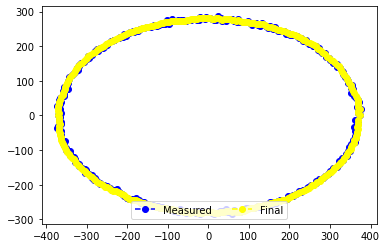

In [128]:
fig,ax = plt.subplots()
ax.plot(measured_x, measured_y, linestyle='--', marker='o', color='b',label='Measured')
ax.plot(actual_x, actual_y, linestyle='--', marker='o', color = 'yellow',label='Final')
ax.legend(fancybox=True, loc='lower center', ncol=2)

## Sensor readings only

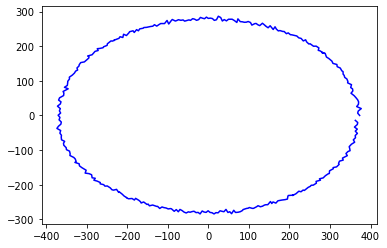

In [117]:
plt.plot(measured_x, measured_y, color = 'blue')

## Motion model only

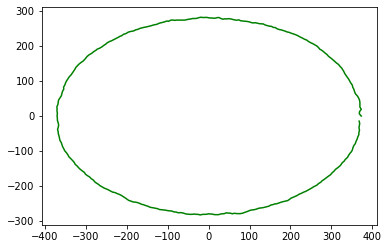

In [118]:
plt.plot(actual_x, actual_y, color = 'green')